<a href="https://colab.research.google.com/github/niyatiiii28/STT_Lab4/blob/main/STT_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team 27** <br>
Siju Niyati Samji 23110312 <br>
M. Lakshmi Manasa 23110193

In [ ]:
!pip install datasets -q

**Task 1**

In [ ]:
#Import the necessary modules
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = load_dataset("mnist")

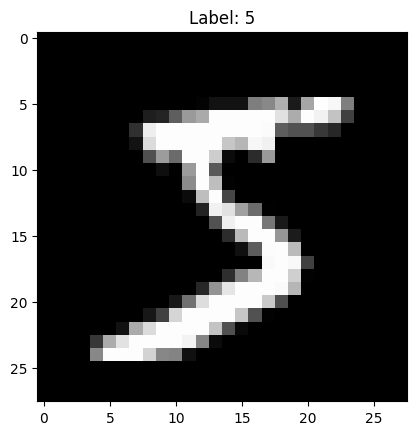

In [ ]:
#Display a sample image with its label
sample = mnist["train"][0]  # Get the first sample from the training set
image = sample["image"]
label = sample["label"]

# Display the image and label
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}")
plt.show()

In [ ]:
import numpy as np

# Convert images to NumPy arrays, normalize, and flatten
def preprocess_mnist_flatten(dataset):
    images = np.array([np.array(img, dtype=np.float32).flatten() / 255.0 for img in dataset["image"]])  # Normalize to [0, 1] and flatten
    labels = np.array(dataset["label"], dtype=np.int64)  # Convert labels to NumPy array
    return images, labels

#Preprocess train and test datasets
train_images, train_labels = preprocess_mnist_flatten(mnist["train"])
test_images, test_labels = preprocess_mnist_flatten(mnist["test"])

# Verify the processed data
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Display a sample flattened image vector and its label
print("Flattened vector for first image:", train_images[0])  # First image as a 1D array
print("Label for first image:", train_labels[0])


Train images shape: (60000, 784), Train labels shape: (60000,)
Test images shape: (10000, 784), Test labels shape: (10000,)
Flattened vector for first image: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.  

In [ ]:
import random
import numpy as np

# Step 1: Set a random seed for reproducibility
random.seed(42)

# Step 2: Define the number of samples to select
initial_labeled_size = 200

# Step 3: Randomly select 200 indices from the training dataset
total_train_samples = train_images.shape[0]
selected_indices = random.sample(range(total_train_samples), initial_labeled_size)

# Step 4: Create the Initial Labeled Dataset
initial_labeled_images = train_images[selected_indices]
initial_labeled_labels = train_labels[selected_indices]

# Step 5: Create the Unlabeled Pool by excluding the selected indices
remaining_indices = list(set(range(total_train_samples)) - set(selected_indices))
unlabeled_pool_images = train_images[remaining_indices]
unlabeled_pool_labels = train_labels[remaining_indices]  # Optional, as these are "unlabeled"

# Step 6: Print the shapes of the datasets
print(f"Initial Labeled Dataset Images: {initial_labeled_images.shape}, Labels: {initial_labeled_labels.shape}")
print(f"Unlabeled Pool Images: {unlabeled_pool_images.shape}, Labels: {unlabeled_pool_labels.shape}")


Initial Labeled Dataset Images: (200, 784), Labels: (200,)
Unlabeled Pool Images: (59800, 784), Labels: (59800,)


In [ ]:
# Function to calculate Label Entropy
def label_entropy(probs):
    return -np.sum(probs * np.log2(probs + 1e-9), axis=1)

In [ ]:
# Function to calculate Vote Entropy
def vote_entropy(votes, committee_size):
    vote_counts = np.zeros((votes.shape[1], 10))
    for i in range(votes.shape[1]):
        for v in votes[:, i]:
            vote_counts[i, v] += 1
    vote_probs = vote_counts / committee_size
    return -np.sum(vote_probs * np.log2(vote_probs + 1e-9), axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random

**Task 2**


In [ ]:
def random_sampling(labeled_images, labeled_labels, unlabeled_images, unlabeled_labels):
    #Initializing the model
    model = RandomForestClassifier()
    #Training the model
    model.fit(labeled_images, labeled_labels)
    accuracies = []

    for _ in range(20):
        #Randomly select a sample from the unlabeled pool
        sample_idx = np.random.randint(len(unlabeled_images))

        # Update labeled dataset
        labeled_images = np.vstack([labeled_images, unlabeled_images[sample_idx]])
        labeled_labels = np.append(labeled_labels, unlabeled_labels[sample_idx])

        # Remove from unlabeled dataset
        unlabeled_images = np.delete(unlabeled_images, sample_idx, axis=0)
        unlabeled_labels = np.delete(unlabeled_labels, sample_idx, axis=0)

        #Re-train the model
        model.fit(labeled_images, labeled_labels)
        #calculating the accuaracy
        acc = accuracy_score(test_labels, model.predict(test_images))
        accuracies.append(acc)
        print(f"Iteration {_+1}, Accuracy: {acc:.4f}")

    return accuracies

# Call the function with correct arguments
acc_random = random_sampling(initial_labeled_images, initial_labeled_labels, unlabeled_pool_images, unlabeled_pool_labels)


Iteration 1, Accuracy: 0.7712
Iteration 2, Accuracy: 0.7641
Iteration 3, Accuracy: 0.7732
Iteration 4, Accuracy: 0.7652
Iteration 5, Accuracy: 0.7593
Iteration 6, Accuracy: 0.7732
Iteration 7, Accuracy: 0.7644
Iteration 8, Accuracy: 0.7677
Iteration 9, Accuracy: 0.7770
Iteration 10, Accuracy: 0.7694
Iteration 11, Accuracy: 0.7757
Iteration 12, Accuracy: 0.7584
Iteration 13, Accuracy: 0.7663
Iteration 14, Accuracy: 0.7643
Iteration 15, Accuracy: 0.7731
Iteration 16, Accuracy: 0.7600
Iteration 17, Accuracy: 0.7667
Iteration 18, Accuracy: 0.7603
Iteration 19, Accuracy: 0.7471
Iteration 20, Accuracy: 0.7598


**Task 3**

In [ ]:
# Uncertainty Sampling using Label Entropy
def uncertainty_sampling(labeled_images, labeled_labels, unlabeled_images, unlabeled_labels):
    #Initializing the model
    model = RandomForestClassifier()
    #Training the model
    model.fit(labeled_images, labeled_labels)
    accuracies = []

    for _ in range(20):
        #Calculating prob for unlabeled images
        probs = model.predict_proba(unlabeled_images)
        #calculating uncertainties using label_entropy function
        uncertainties = label_entropy(probs)
        #Select the sample with the highest uncertainty
        sample_idx = np.argmax(uncertainties)

        # Update labeled dataset
        labeled_images = np.vstack([labeled_images, unlabeled_images[sample_idx]])
        labeled_labels = np.append(labeled_labels, unlabeled_labels[sample_idx])

        # Remove from unlabeled dataset
        unlabeled_images = np.delete(unlabeled_images, sample_idx, axis=0)
        unlabeled_labels = np.delete(unlabeled_labels, sample_idx, axis=0)

        #Retrain the model
        model.fit(labeled_images, labeled_labels)
        #calculate the accuracy
        acc = accuracy_score(test_labels, model.predict(test_images))
        accuracies.append(acc)
        print(f"Iteration {_+1}, Accuracy: {acc:.4f}")
    return accuracies

# Call the function with correct arguments
acc_uncertainty = uncertainty_sampling(initial_labeled_images, initial_labeled_labels, unlabeled_pool_images, unlabeled_pool_labels)

Iteration 1, Accuracy: 0.7577
Iteration 2, Accuracy: 0.7538
Iteration 3, Accuracy: 0.7657
Iteration 4, Accuracy: 0.7641
Iteration 5, Accuracy: 0.7621
Iteration 6, Accuracy: 0.7736
Iteration 7, Accuracy: 0.7698
Iteration 8, Accuracy: 0.7649
Iteration 9, Accuracy: 0.7608
Iteration 10, Accuracy: 0.7613
Iteration 11, Accuracy: 0.7562
Iteration 12, Accuracy: 0.7788
Iteration 13, Accuracy: 0.7744
Iteration 14, Accuracy: 0.7644
Iteration 15, Accuracy: 0.7643
Iteration 16, Accuracy: 0.7727
Iteration 17, Accuracy: 0.7811
Iteration 18, Accuracy: 0.7704
Iteration 19, Accuracy: 0.7639
Iteration 20, Accuracy: 0.7791


**Task 4**

In [ ]:
# Query-by-Committee using Vote Entropy
def query_by_committee(labeled_images, labeled_labels, unlabeled_images, unlabeled_labels):
    committee_size = 5
    #Initial a commitee of models
    committee = [RandomForestClassifier() for _ in range(committee_size)]
    accuracies = []

    #Train the model
    for model in committee:
        model.fit(labeled_images, labeled_labels)

    for _ in range(20):
        # Get predictions from all committee models on the unlabeled dataset
        votes = np.array([model.predict(unlabeled_images) for model in committee]).T
        #compute vote entropy
        vote_entropy_values = vote_entropy(votes, committee_size)
        # Select the sample with the highest vote entropy (most disagreement)
        sample_idx = np.argmax(vote_entropy_values)

        # Update labeled dataset
        labeled_images = np.vstack([labeled_images, unlabeled_images[sample_idx]])
        labeled_labels = np.append(labeled_labels, unlabeled_labels[sample_idx])

        # Remove from unlabeled dataset
        unlabeled_images = np.delete(unlabeled_images, sample_idx, axis=0)
        unlabeled_labels = np.delete(unlabeled_labels, sample_idx, axis=0)

        #re-train the model
        for model in committee:
            model.fit(labeled_images, labeled_labels)
        #calclulate the accuracy
        acc = accuracy_score(test_labels, committee[0].predict(test_images))
        accuracies.append(acc)
        print(f"Iteration {_+1}, Accuracy: {acc:.4f}")
    return accuracies

# Call the function with correct arguments
acc_qbc = query_by_committee(initial_labeled_images, initial_labeled_labels, unlabeled_pool_images, unlabeled_pool_labels)

Iteration 1, Accuracy: 0.7596
Iteration 2, Accuracy: 0.7555
Iteration 3, Accuracy: 0.7687
Iteration 4, Accuracy: 0.7527
Iteration 5, Accuracy: 0.7694
Iteration 6, Accuracy: 0.7510
Iteration 7, Accuracy: 0.7607
Iteration 8, Accuracy: 0.7665
Iteration 9, Accuracy: 0.7631
Iteration 10, Accuracy: 0.7601
Iteration 11, Accuracy: 0.7838
Iteration 12, Accuracy: 0.7655
Iteration 13, Accuracy: 0.7630
Iteration 14, Accuracy: 0.7569
Iteration 15, Accuracy: 0.7648
Iteration 16, Accuracy: 0.7728
Iteration 17, Accuracy: 0.7812
Iteration 18, Accuracy: 0.7741
Iteration 19, Accuracy: 0.7762
Iteration 20, Accuracy: 0.7657


**Task 5**

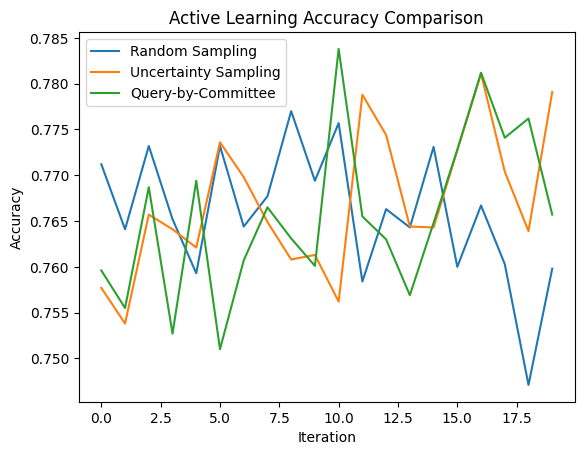

In [ ]:
# Plot results
plt.plot(acc_random, label='Random Sampling')
plt.plot(acc_uncertainty, label='Uncertainty Sampling')
plt.plot(acc_qbc, label='Query-by-Committee')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Active Learning Accuracy Comparison")
plt.legend()
plt.show()

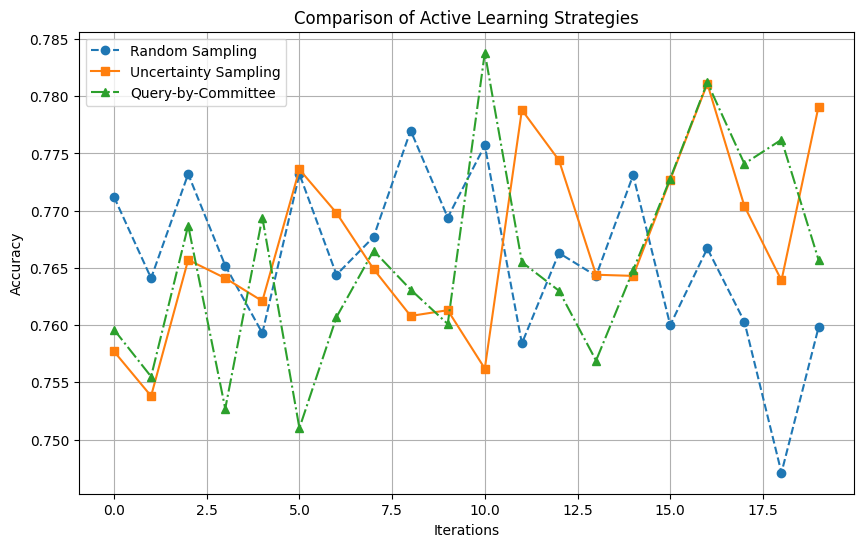

In [ ]:
iterations = list(range(len(acc_random)))

# Plot accuracy trends
plt.figure(figsize=(10, 6))
plt.plot(iterations, acc_random, label='Random Sampling', marker='o', linestyle='--')
plt.plot(iterations, acc_uncertainty, label='Uncertainty Sampling', marker='s', linestyle='-')
plt.plot(iterations, acc_qbc, label='Query-by-Committee', marker='^', linestyle='-.')

plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Comparison of Active Learning Strategies")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Print final accuracies
print("Final Accuracies:")
print(f"Random Sampling: {acc_random[-1]:.4f}")
print(f"Uncertainty Sampling: {acc_uncertainty[-1]:.4f}")
print(f"Query-by-Committee: {acc_qbc[-1]:.4f}")


Final Accuracies:
Random Sampling: 0.7598
Uncertainty Sampling: 0.7791
Query-by-Committee: 0.7657


In Random sampling, we randomly selected new samples from unlabeled pool without considering any disagrement/entropy.

In Uncertain sampling, we calculated label entory after each iteration and according to that we selected the most uncetrain sample which helped the model to improve it's performance about uncertain instances.

In Query-by-commitee we made 5 commitees of random forest models, these commitees voted on samples and sample with highest voted entropy was selected.



**Conclusion**

Uncertain sampling performed the best among all 3 models. which proves that in active learning selecting the most uncertain samples is the most effective learning strategy.


QBC performed a bit better than Random sampling. But it didn't perform better than uncertain sampling because more computation made it less efficient.


Random forest has the lowest accuracy becasue it does not consider any disagrement while re training the model.